### 이미지 파일(.jpg) 읽고 화면에 출력하는 코드

- from PIL import Image : JPG, PNG 등 이미지 파일을 읽기 위해 Pillow 라이브러리를 가져옴

원하는 이미지만 선택해서 소규모 다운로드


https://www.pexels.com/ko-kr/search/dog/

https://www.pexels.com/ko-kr/search/cat/

모두 수십 장만 다운로드해 실습하기에 딱 좋은 곳

In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


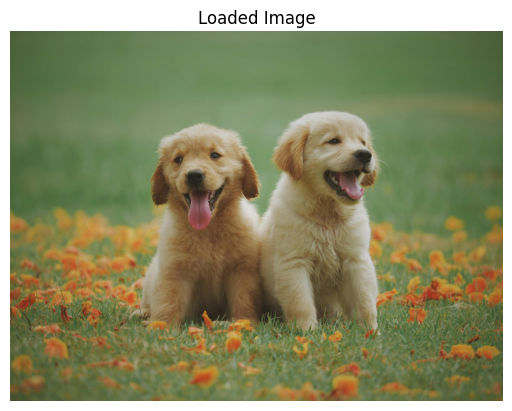

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# 1) 이미지 파일 경로 지정
file_path = "data/images/dog1.jpg"   # 출력할 JPG 파일 이름 또는 경로

# 2) JPG 파일을 읽어서 이미지 객체 생성
img = Image.open(file_path)

# 3) 화면에 이미지 출력
plt.imshow(img)
plt.axis("off")  # 축(숫자 눈금) 숨기기
plt.title("Loaded Image")  # 이미지 제목 지정
plt.show()


In [1]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --------- ------------------------------ 2.1/8.7 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.7 MB 11.5 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 9.9 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.5 MB 9.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.5 MB 8.1 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/38.5 MB 7.0 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.5 MB 6.4 MB/s eta 0:00:06
   ------ --------------------------------- 6.6/38.5 MB 6.1 MB/s eta 0:00:06
   -------- ------------------------------- 7.9/38.5 MB 6.2 MB/s eta 0:00:05
   --------- -----

총 로드된 이미지 수: 98장
Train = 78장, Test = 20장

=== TRAIN DATASET 상위 5개 ===
Image(path=data/images/dog_cat/Cat\8100.jpg, label=cat)
Image(path=data/images/dog_cat/Cat\8121.jpg, label=cat)
Image(path=data/images/dog_cat/Cat\8119.jpg, label=cat)
Image(path=data/images/dog_cat/Dog\8115.jpg, label=dog)
Image(path=data/images/dog_cat/Dog\8139.jpg, label=dog)


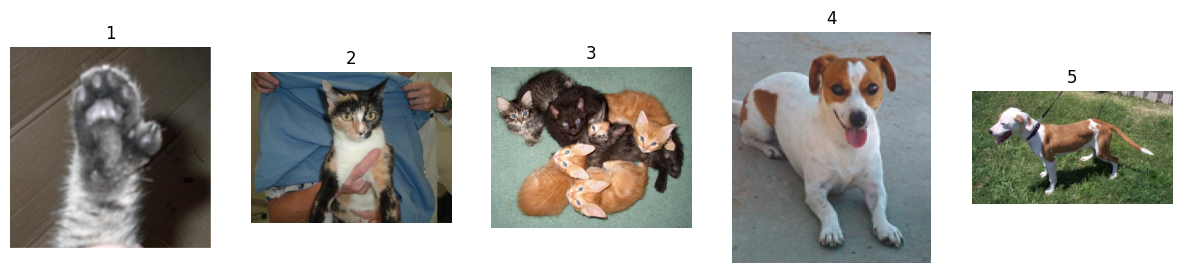


=== TEST DATASET 상위 5개 ===
Image(path=data/images/dog_cat/Cat\8113.jpg, label=cat)
Image(path=data/images/dog_cat/Dog\8140.jpg, label=dog)
Image(path=data/images/dog_cat/Cat\8145.jpg, label=cat)
Image(path=data/images/dog_cat/Dog\8118.jpg, label=dog)
Image(path=data/images/dog_cat/Cat\8132.jpg, label=cat)


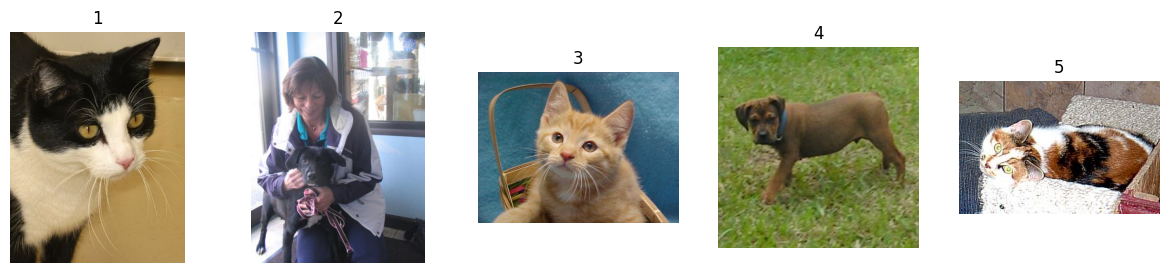

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ------------------------------
# 1) 이미지 객체 클래스 정의
# ------------------------------
class ImageData:
    def __init__(self, file_path, label):
        self.file_path = file_path
        self.image = Image.open(file_path)     # PIL 이미지 객체 로드
        self.label = label
    def __str__(self):
        return f"Image(path={self.file_path}, label={self.label})"


# ------------------------------
# 2) 이미지 파일 읽어서 객체 리스트 생성
# ------------------------------
image_dir_dog = "data/images/dog_cat/Dog"  # 이미지들이 들어 있는 폴더 (예: images/ 폴더에 jpg 100장)
image_dir_cat = "data/images/dog_cat/Cat"
image_list = []

for filename in os.listdir(image_dir_dog):
    if filename.lower().endswith(".jpg"):
        full_path = os.path.join(image_dir_dog, filename)
        label = image_dir_dog[-3:].lower()
        image_list.append(ImageData(full_path,label))

for filename in os.listdir(image_dir_cat):
    if filename.lower().endswith(".jpg"):
        full_path = os.path.join(image_dir_cat, filename)
        label = image_dir_cat[-3:].lower()
        image_list.append(ImageData(full_path,label))

print(f"총 로드된 이미지 수: {len(image_list)}장")


# ------------------------------
# 3) Train : Test = 8 : 2 분리
# ------------------------------
train_set, test_set = train_test_split(
    image_list,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

print(f"Train = {len(train_set)}장, Test = {len(test_set)}장")


# ------------------------------
# 4) Train / Test 각 5개씩 화면에 출력
# ------------------------------
def show_head(dataset, title):
    print(f"\n=== {title} 상위 5개 ===")
    for obj in dataset[:5]:
        print(obj)     # __str__() 실행
    # 실제 이미지 표시
    fig, ax = plt.subplots(1, len(dataset[:5]), figsize=(15, 3))
    for i, obj in enumerate(dataset[:5]):
        ax[i].imshow(obj.image)
        ax[i].axis("off")
        ax[i].set_title(f"{i+1}")
    plt.show()


show_head(train_set, "TRAIN DATASET")
show_head(test_set, "TEST DATASET")
